<a href="https://colab.research.google.com/github/MaciejRR/NBA_23_24_Analysis/blob/main/NBA_23_24_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
df = pd.read_csv("NBA_23_24_per_game.csv")
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C-PF,24,TOT,26,0,17.2,3.0,6.6,0.453,...,0.571,2.0,3.4,5.3,1.7,0.6,0.5,1.1,1.6,7.4
1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,Precious Achiuwa,PF,24,NYK,1,0,9.0,0.0,2.0,0.000,...,NaN,1.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0
3,Bam Adebayo,C,26,MIA,23,23,34.1,8.0,15.7,0.506,...,0.777,2.1,8.3,10.4,4.0,1.1,1.0,2.7,2.4,22.0
4,Ochai Agbaji,SG,23,UTA,34,10,21.1,2.6,5.7,0.451,...,0.714,0.8,1.7,2.5,1.0,0.6,0.5,0.7,1.5,6.6


Players who were traded during the season appear multiple times in the dataset.
For player-level analysis, only rows with **Team == "TOT"** (like TOTAL) were retained to avoid double counting.

In [31]:
df_total = df[df["Tm"] == "TOT"]
df_total.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C-PF,24,TOT,26,0,17.2,3.0,6.6,0.453,...,0.571,2.0,3.4,5.3,1.7,0.6,0.5,1.1,1.6,7.4
14,OG Anunoby,SF,26,TOT,28,28,33.4,5.9,11.9,0.492,...,0.717,1.0,3.0,4.0,2.6,1.1,0.5,1.6,2.4,15.2
33,RJ Barrett,SG,23,TOT,27,27,29.4,6.3,14.8,0.425,...,0.826,0.8,3.6,4.4,2.4,0.4,0.3,1.9,1.9,18.3
39,Nicolas Batum,PF,35,TOT,21,14,23.7,2.0,3.8,0.538,...,0.636,0.9,2.8,3.6,2.1,0.6,0.6,0.5,1.7,5.8
106,Robert Covington,SF-PF,33,TOT,29,6,16.8,1.5,3.4,0.439,...,0.846,1.1,2.3,3.3,0.8,1.3,0.6,0.4,1.9,4.4


In [32]:
df = df.copy() #we dont want to modify original DataFrame
has_total =df.groupby("Player")["Tm"].transform(lambda x: (x == "TOT").any())

df_clean = df[
    ((has_total) & (df["Tm"] == "TOT")) |
    ((~has_total) & (df["Tm"] != "TOT"))
].copy()

To avoid double counting traded players, a single record per player was retained.
If a season-wide (`TOT`) record exists, it was used; otherwise the team-level record was kept.

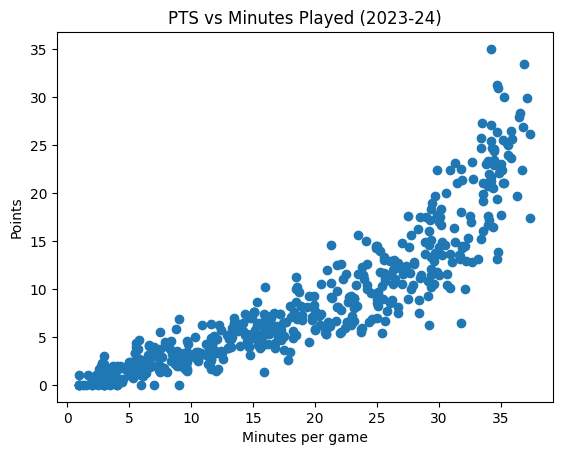

In [33]:
plt.figure()
plt.scatter(df_clean["MP"], df_clean["PTS"])
plt.xlabel("Minutes per game")
plt.ylabel("Points")
plt.title("PTS vs Minutes Played (2023-24)")
plt.show()

Players with more minutes generally score more points, but there is a wide spread, suggesting differences in scoring efficiency.

In [38]:
top_scorers = df_clean.sort_values(by="PTS", ascending=False)
(
  top_scorers.head(10)[["Player", "Tm", "Pos", "MP", "PTS"]]
    .style
    .format({
        "MP": "{:.1f}",
        "PTS": "{:.1f}"
            })
    .set_properties(
        subset=["PTS"],
        **{
            "background-color": "#7a2e2e",
            "color": "white",
            "font-weight": "bold"
          }
    )
)

,Player,Tm,Pos,MP,PTS
137,Joel Embiid,PHI,C,34.2,35.0
125,Luka Dončić,DAL,PG,36.9,33.4
161,Shai Gilgeous-Alexander,OKC,PG,34.7,31.2
11,Giannis Antetokounmpo,MIL,PF,34.8,30.9
147,De'Aaron Fox,SAC,PG,35.3,30.0
131,Kevin Durant,PHO,PF,37.1,29.9
534,Trae Young,ATL,PG,36.6,28.3
329,Donovan Mitchell,CLE,SG,36.5,27.9
113,Stephen Curry,GSW,PG,33.5,27.3
438,Anfernee Simons,POR,SG,34.2,27.1


In [41]:
top_assistants = df_clean.sort_values(by="AST", ascending=False)
(
    top_assistants.head(10)[["Player", "Tm", "Pos", "MP", "AST"]]
    .style
    .format({
        "MP": "{:.1f}",
        "AST": "{:.1f}"
            })
    .set_properties(
        subset=["AST"],
        **{
            "background-color": "#7F8E18",
            "color": "white",
            "font-weight": "bold"
          }
    )
)

,Player,Tm,Pos,MP,AST
181,Tyrese Haliburton,IND,PG,34.3,12.7
534,Trae Young,ATL,PG,36.6,11.3
125,Luka Dončić,DAL,PG,36.9,9.4
242,Nikola Jokić,DEN,C,33.4,9.1
488,Fred VanVleet,HOU,PG,37.4,8.5
25,LaMelo Ball,CHO,PG,33.4,8.2
184,James Harden,LAC,PG,34.0,8.0
58,Devin Booker,PHO,PG,35.8,7.9
336,Ja Morant,MEM,PG,35.5,7.8
418,Domantas Sabonis,SAC,C,34.7,7.5
